In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.cm import get_cmap
from matplotlib.lines import Line2D
import pandas as pd
import pylab

/tmp/ipykernel_398056/4033986871.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def get_counts_vector(labels_vector):
    unique_labels, label_counts = np.unique(labels_vector, return_counts=True)
    counts_vector = np.zeros(21, dtype=int)
    counts_vector[unique_labels] = label_counts
    return counts_vector, unique_labels

#Function to sort patient data by maximum occuring single cell label
def get_sorted_patient_data(class_path):
    total_counts =  np.zeros(len(colors)) # In order to get the maximum occuring single cell label
    patient_data = []  # List to store data for each patient
    for j, patient_folder in enumerate(os.listdir(class_path)):
        if len(patient_folder) == 3 or ("patient" in patient_folder):
            probs_path = os.path.join(class_path, patient_folder) + '/single_cell_probabilities.npy'
            sc_probs = np.load(probs_path)
            sc_class = np.argmax(sc_probs, axis=1)
            counts_vector, unique_labels = get_counts_vector(sc_class)
            counts_percentages = counts_vector / np.sum(counts_vector) * 100    
            total_counts+=counts_vector
            # Store data for each patient
            patient_data.append({'patient_folder': patient_folder, 'sorted_labels': unique_labels,'counts_percentages': counts_percentages})
    
    max_sc_class_index=np.argmax(total_counts)
    # Sort patient_data based on the label of maximum single cell class counts
    patient_data.sort(key=lambda x: np.max(x['counts_percentages'][max_sc_class_index]))
    return patient_data

def plot_sc_percentages_per_patient(patient_data,class_folder,image_filepath="",figsize=(5,8),disable_yticks=False):
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(class_folder)
    
    # Create a horizontal stacked bar plot for each patient in the class
    for patient_info in patient_data:
            patient_folder = patient_info['patient_folder']
            sorted_labels = patient_info['sorted_labels']
            counts_percentages = patient_info['counts_percentages']
        
            # Create a horizontal stacked bar plot for each patient in the class
            left = 0
            for label in sorted_labels:
                ax.barh(patient_folder, counts_percentages[label], label=cv[label], alpha=1, color=colors[label], left=left)
                left += counts_percentages[label]
    
    # Legend
    if class_folder == "NPM1":
        legend_elements = [Line2D([0], [0], color=colors[color], lw=4, label=cv[color]) for color in sorted_labels]
        legend = fig.legend(handles=legend_elements, title="Legend", bbox_to_anchor=(1.05, 0.5), loc='center left', fontsize=12)
        export_legend(legend, filename=image_path + "legend.png")
    
    # Get rid of frame
    for spine in ax.spines.values():
        spine.set_visible(False)
    if disable_yticks:
        plt.yticks([])
    
    # Remove xticks
    plt.xticks([])
    fig.savefig(image_filepath)
    plt.show()

def export_legend(legend, filename="legend.png"):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)

In [3]:
#Get the labels for single cells
cv = pd.read_csv("/home/hhauger/CMSCB-SCEMILA/Single_Cell_Classifier/class_conversion-csv/class_conversion.csv", index_col=0)
cv.drop(['size_tot', 'train_size', 'val_size', 'test_size'], axis=1, inplace=True)
cv = cv.set_index('art_lbl').T.to_dict(orient="index")
cv = cv['true_lbl']

In [4]:
# Path to the folder containing your subfolders
image_path = '/home/hhauger/Figures/'
#Define the colors
cmap = get_cmap('tab20c', 21)
colors = [cmap(i) for i in range(21)]

/tmp/ipykernel_398056/2008970942.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab20c', 21)


## Real patients

### Train/validation data set

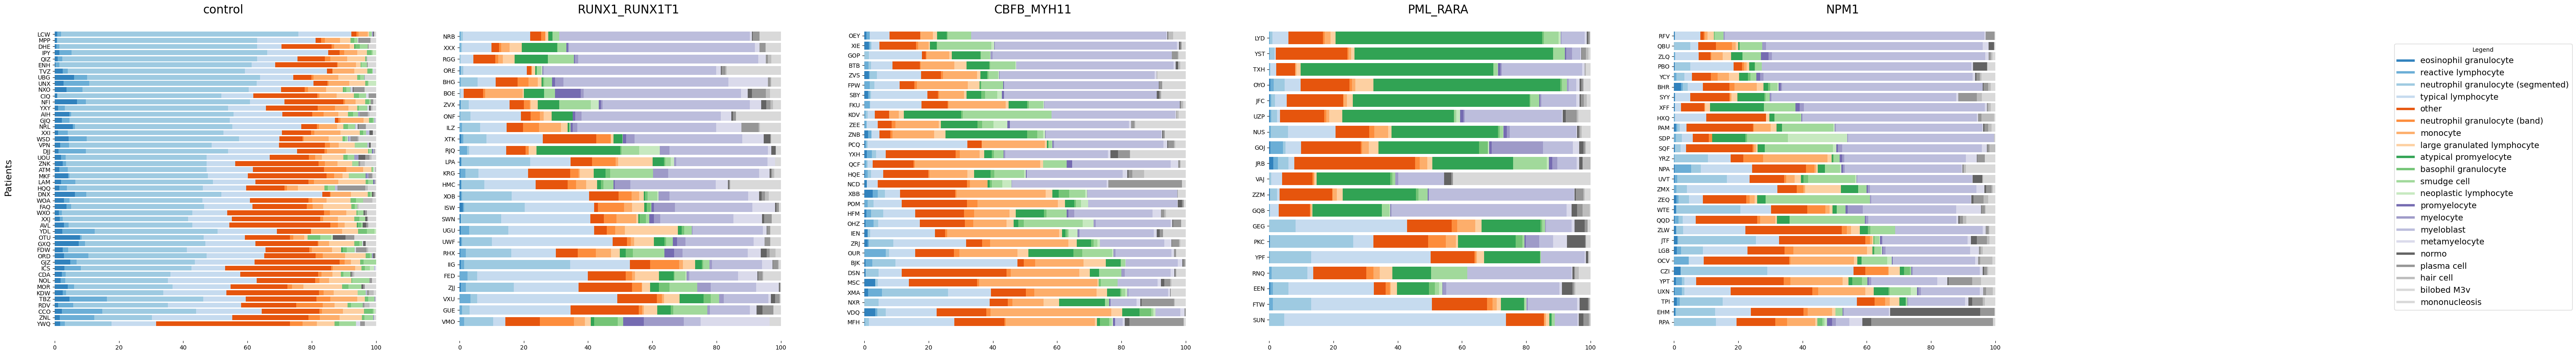

<Figure size 300x200 with 0 Axes>

In [5]:
data_path = '/mnt/volume/shared/data_file/data'
# Initialize figure for subplots
fig, axs = plt.subplots(nrows=1, ncols=len(os.listdir(data_path)), figsize=(12 * len(os.listdir(data_path)), 10), sharey=False)
figlegend = pylab.figure(figsize=(3,2))
# Initialize legend elements for the overall plot
legend_elements = []

# Iterate over all subfolders in the data folder
for i, class_folder in enumerate(os.listdir(data_path)):
    class_path = os.path.join(data_path, class_folder)
    axs[i].set_title(class_folder, fontsize=20)

    if os.path.isdir(class_path):
        patient_data = get_sorted_patient_data(class_path)
        for patient_info in patient_data:
            patient_folder = patient_info['patient_folder']
            sorted_labels = patient_info['sorted_labels']
            counts_percentages = patient_info['counts_percentages']
        
            # Create a horizontal stacked bar plot for each patient in the class
            left = 0
            for label in sorted_labels:
                axs[i].barh(patient_folder, counts_percentages[label], label=cv[label], alpha=1, color=colors[label], left=left)
                left += counts_percentages[label]
                
        # Get rid of frame
        for spine in axs[i].spines.values():
            spine.set_visible(False)
        
# Add labels with increased font size
fig.text(0.105, 0.5, "Patients", va='center', rotation='vertical', fontsize=16)
legend_elements.extend([Line2D([0], [0], color=colors[color], lw=4, label=cv[color]) for color in range(len(colors))])
# Create a legend for the overall plot with increased font size
legend = fig.legend(handles=legend_elements, title="Legend", bbox_to_anchor=(1.05, 0.5), loc='center left', fontsize=14)
export_legend(legend)

# Show the plot
plt.show()
fig.savefig(image_path+'plot_train', bbox_inches='tight')

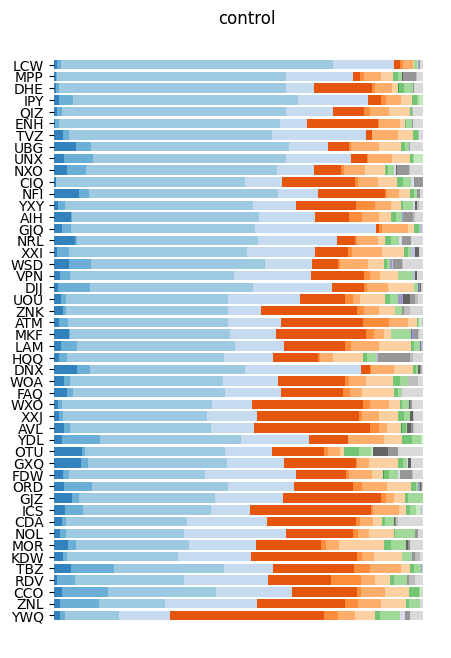

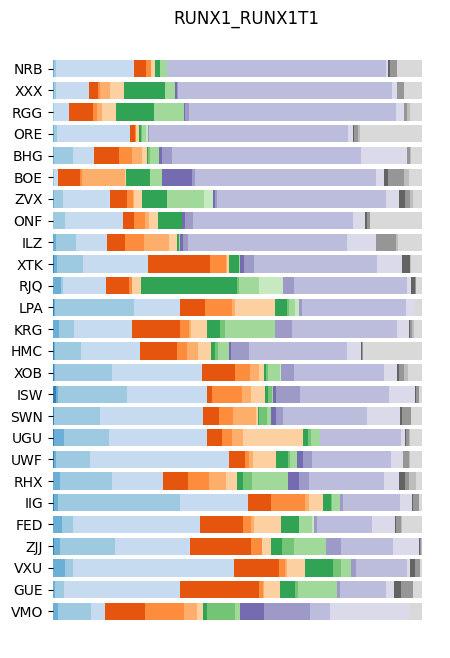

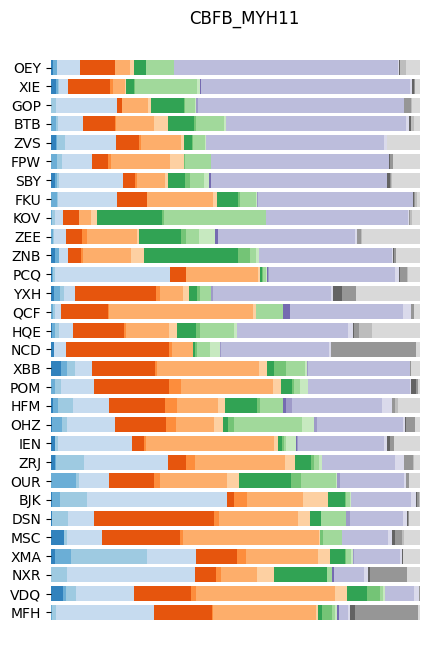

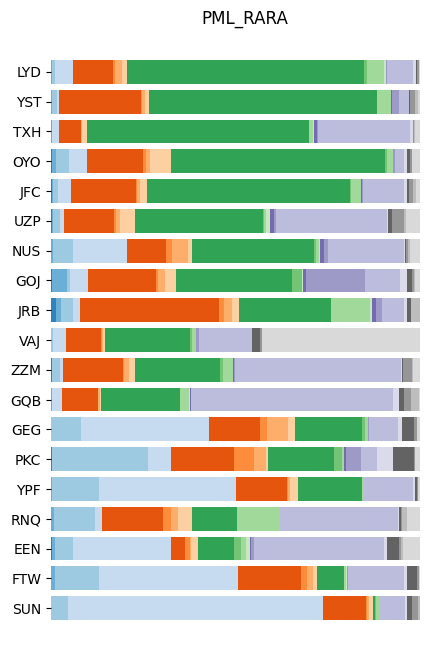

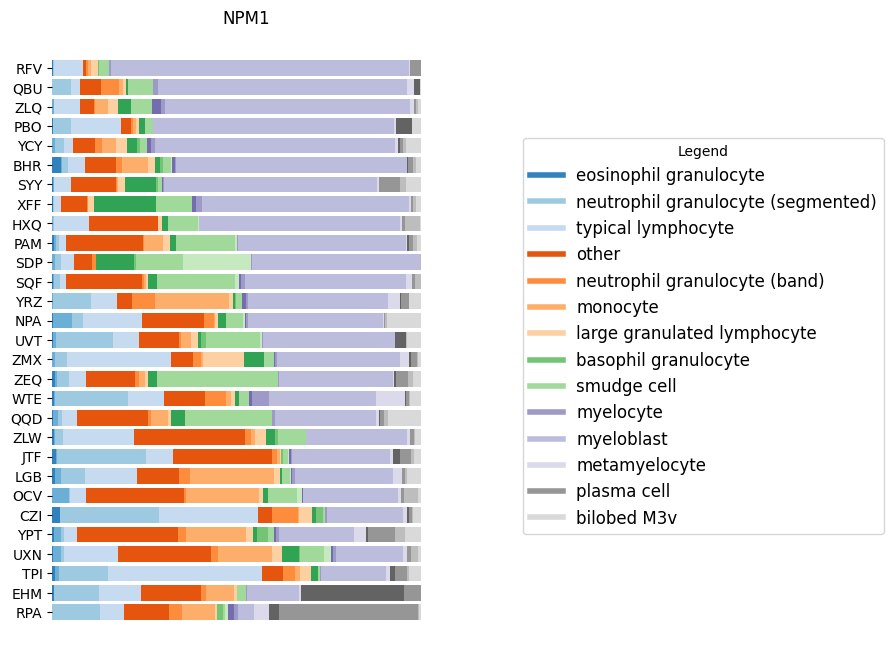

In [79]:
# Iterate over all subfolders in the data folder
for class_folder in os.listdir(data_path):
    class_path = os.path.join(data_path, class_folder)
    
    if os.path.isdir(class_path):
        #Store data for each patient in order to store it
        patient_data = get_sorted_patient_data(class_path)
        plot_sc_percentages_per_patient(patient_data,class_folder,image_path+f'plot_train_{class_folder}.png')

### Test data set

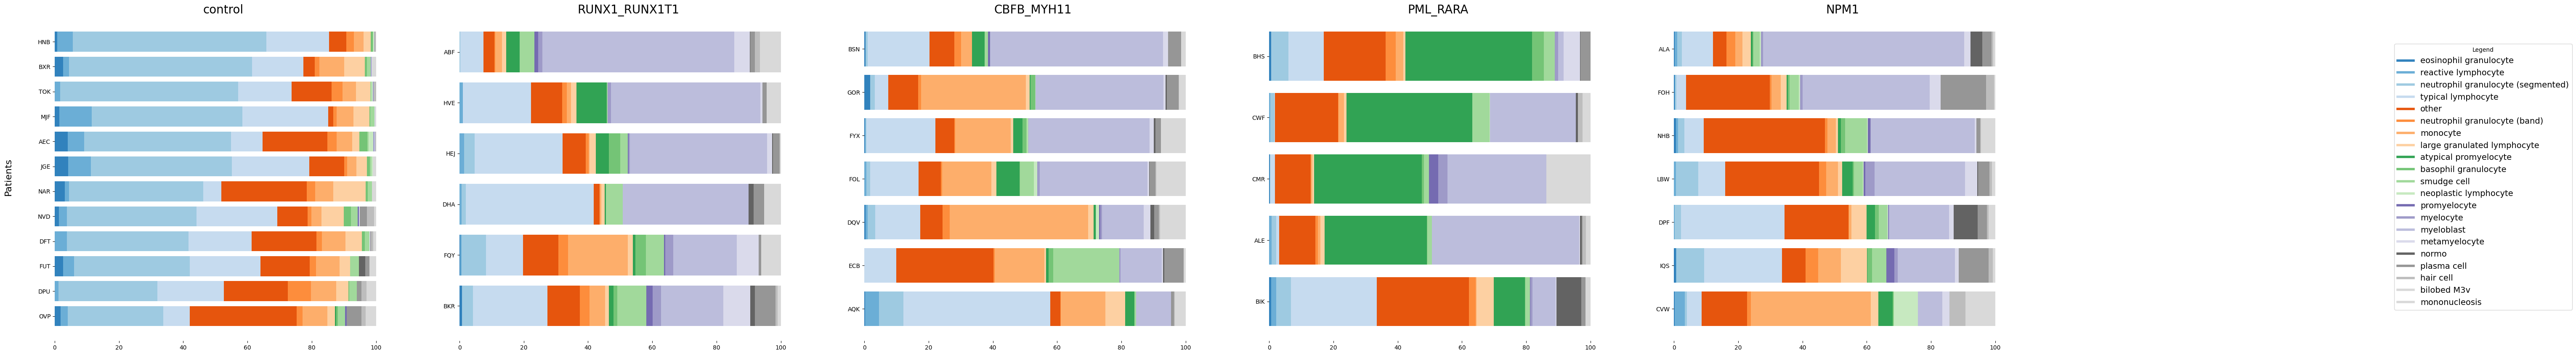

<Figure size 300x200 with 0 Axes>

In [5]:
data_path = '/mnt/volume/shared/data_file/test_data'
# Initialize figure for subplots
fig, axs = plt.subplots(nrows=1, ncols=len(os.listdir(data_path)), figsize=(12 * len(os.listdir(data_path)), 10), sharey=False)
figlegend = pylab.figure(figsize=(3,2))
# Initialize legend elements for the overall plot
legend_elements = []

# Iterate over all subfolders in the data folder
for i, class_folder in enumerate(os.listdir(data_path)):
    class_path = os.path.join(data_path, class_folder)
    
    # Ensure that the item is a directory
    if os.path.isdir(class_path):
        patient_data = get_sorted_patient_data(class_path)
        for patient_info in patient_data:
            patient_folder = patient_info['patient_folder']
            sorted_labels = patient_info['sorted_labels']
            counts_percentages = patient_info['counts_percentages']
            axs[i].set_title(class_folder, fontsize=20)
            # Create a horizontal stacked bar plot for each patient in the class
            left = 0
            for label in sorted_labels:
                axs[i].barh(patient_folder, counts_percentages[label], label=cv[label], alpha=1, color=colors[label], left=left)
                left += counts_percentages[label]
                
        # Get rid of frame
        for spine in axs[i].spines.values():
            spine.set_visible(False)
        
# Add labels with increased font size
fig.text(0.105, 0.5, "Patients", va='center', rotation='vertical', fontsize=16)
legend_elements.extend([Line2D([0], [0], color=colors[color], lw=4, label=cv[color]) for color in range(len(colors))])
# Create a legend for the overall plot with increased font size
legend = fig.legend(handles=legend_elements, title="Legend", bbox_to_anchor=(1.05, 0.5), loc='center left', fontsize=14)
export_legend(legend)

# Show the plot
plt.show()
fig.savefig(image_path+'plot_test', bbox_inches='tight')

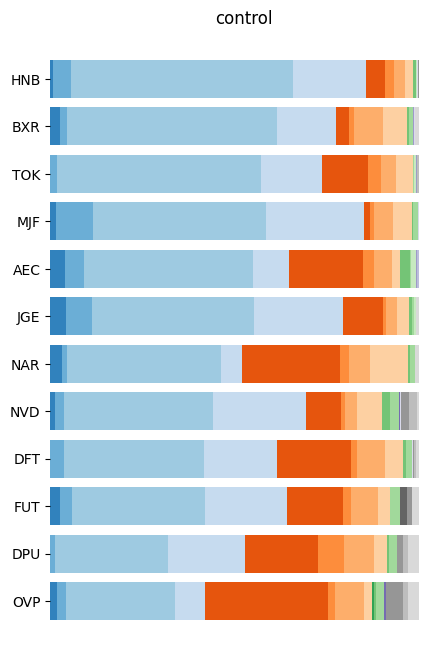

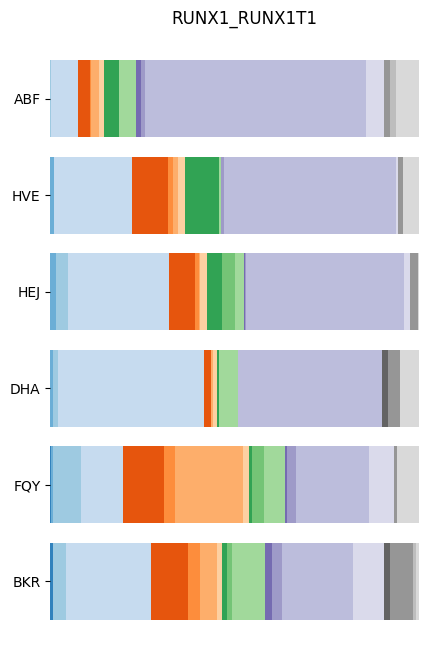

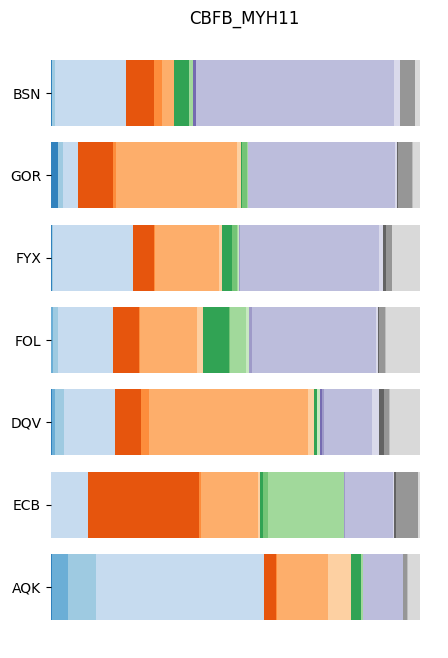

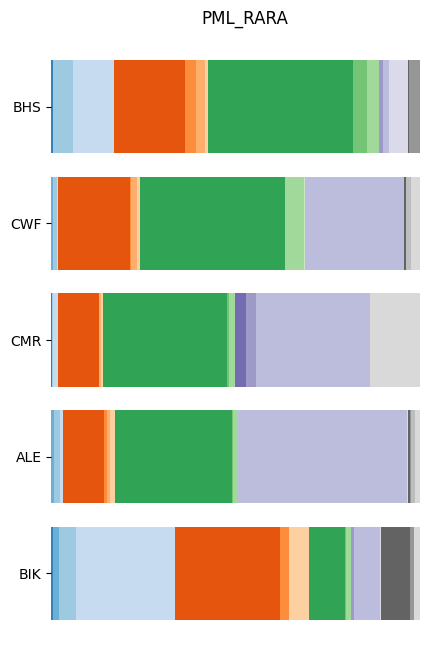

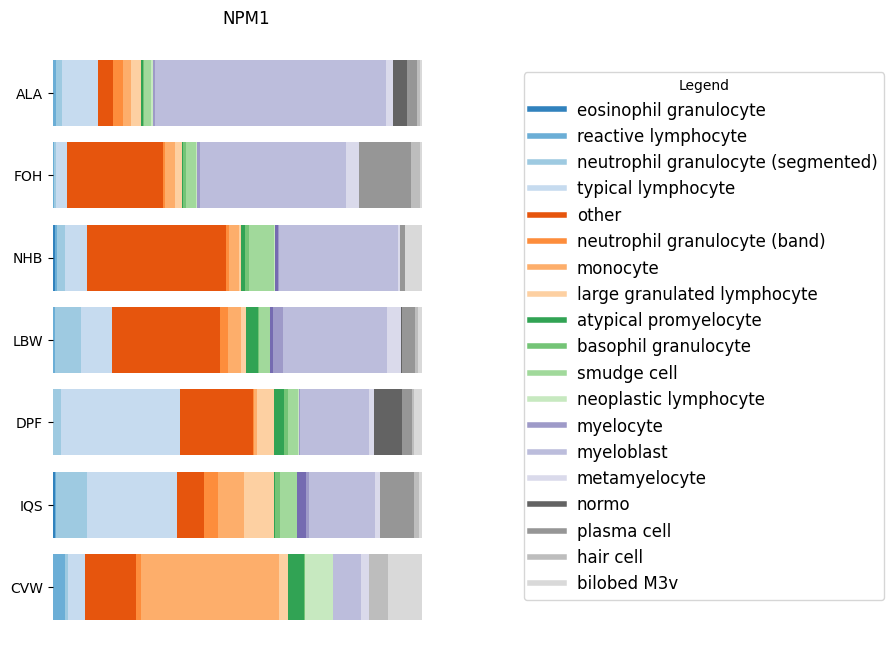

In [6]:
# Iterate over all subfolders in the data folder
for class_folder in os.listdir(data_path):
    class_path = os.path.join(data_path, class_folder)
    
    if os.path.isdir(class_path):
        #Store data for each patient in order to store it
        patient_data = get_sorted_patient_data(class_path)
        plot_sc_percentages_per_patient(patient_data,class_folder,image_path+f'plot_test_{class_folder}.png')

## Artificial patients

In [5]:
experiment_nr="3_seed42"
data_path = f'/mnt/volume/shared/data_file/artificialdata/experiment_{experiment_nr}/data'
data_path

'/mnt/volume/shared/data_file/artificialdata/experiment_3_seed42/data'

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/volume/shared/data_file/artificialdata/experiment_3_seed42/data/control/patient_36/single_cell_probabilities.npy'

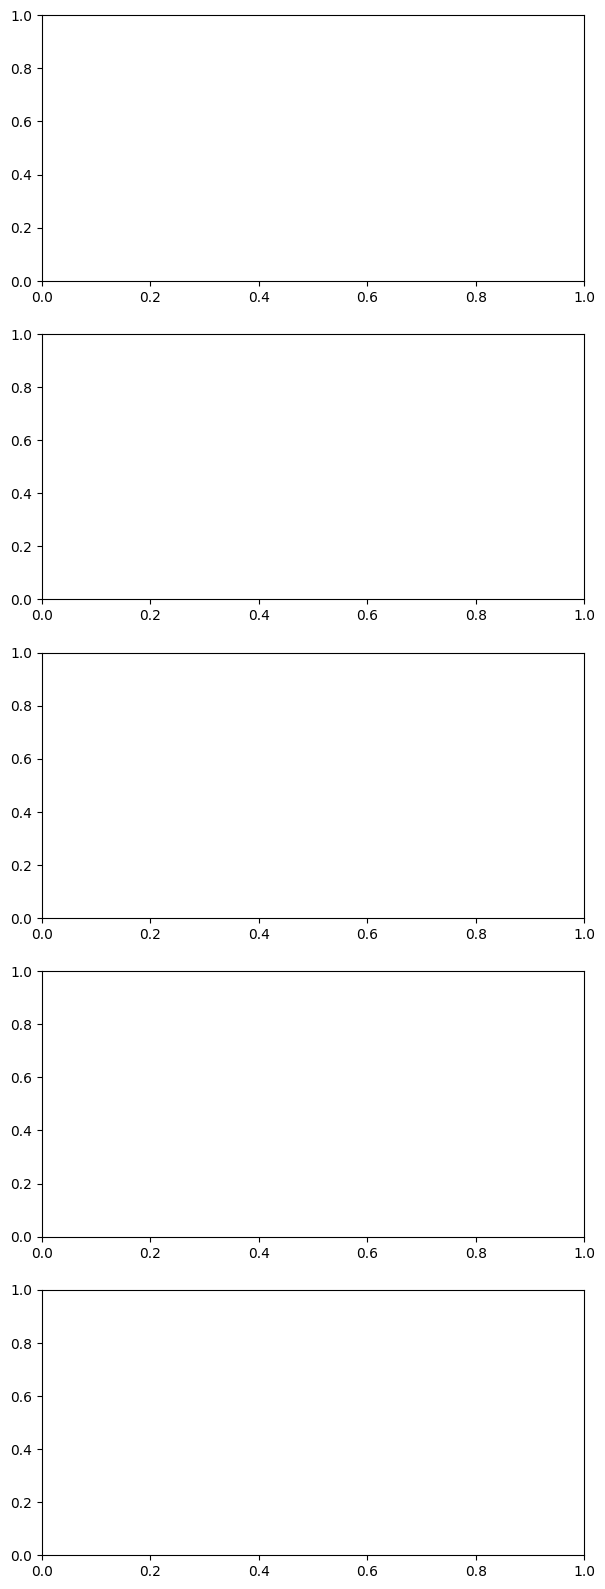

<Figure size 300x200 with 0 Axes>

In [6]:
# Initialize figure for subplots
fig, axs = plt.subplots(nrows=len(os.listdir(data_path)), ncols=1, figsize=(7,4*len(os.listdir(data_path)) ), sharey=False)
figlegend = pylab.figure(figsize=(3,2))
# Initialize legend elements for the overall plot
legend_elements = []

# Iterate over all subfolders in the data folder
for i, class_folder in enumerate(os.listdir(data_path)):
    class_path = os.path.join(data_path, class_folder)
    
    if os.path.isdir(class_path):
        patient_data = get_sorted_patient_data(class_path)
        
        for patient_info in patient_data:
            patient_folder = patient_info['patient_folder']
            sorted_labels = patient_info['sorted_labels']
            counts_percentages = patient_info['counts_percentages']
            axs[i].set_title(class_folder, fontsize=20)
            # Create a horizontal stacked bar plot for each patient in the class
            left = 0
            for label in sorted_labels:
                axs[i].barh(patient_folder, counts_percentages[label], label=cv[label], alpha=1, color=colors[label], left=left)
                left += counts_percentages[label]
                
        # Get rid of frame
        for spine in axs[i].spines.values():
            spine.set_visible(False)
        axs[i].set_xticks([])
        axs[i].set_yticks([])

plt.tight_layout()
#export_legend(legend,image_path+"legend_artificial.png")
plt.show()
fig.savefig(image_path+f'plot_experiment{experiment_nr}', bbox_inches='tight')

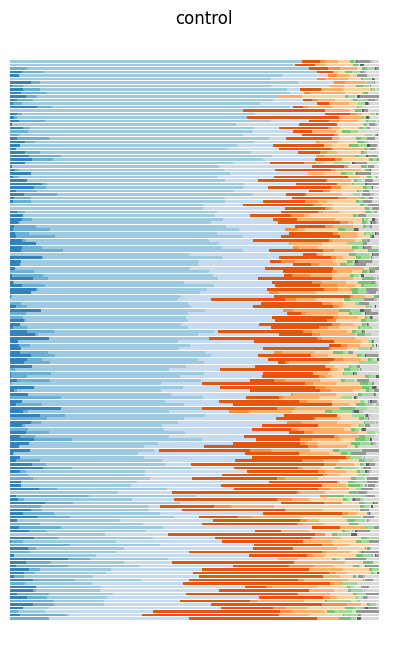

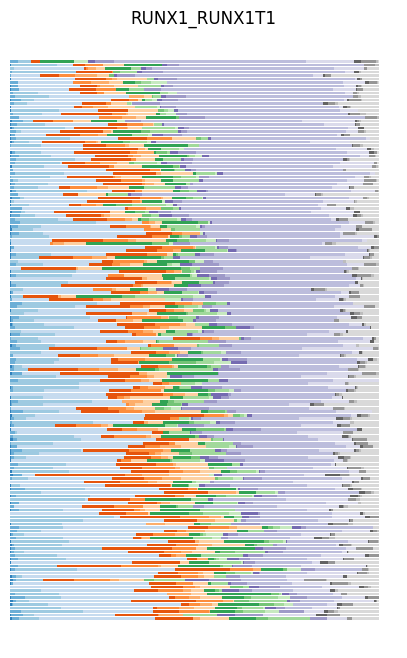

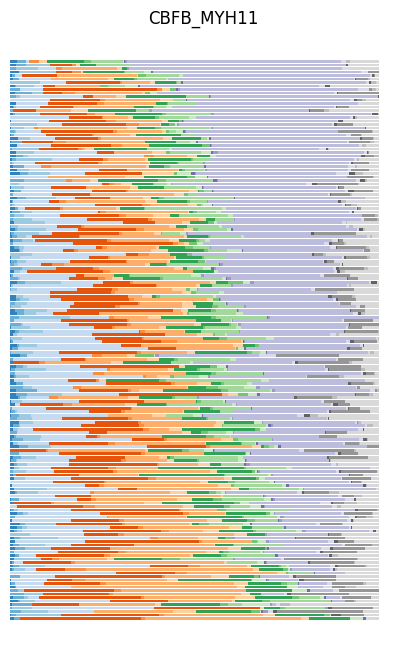

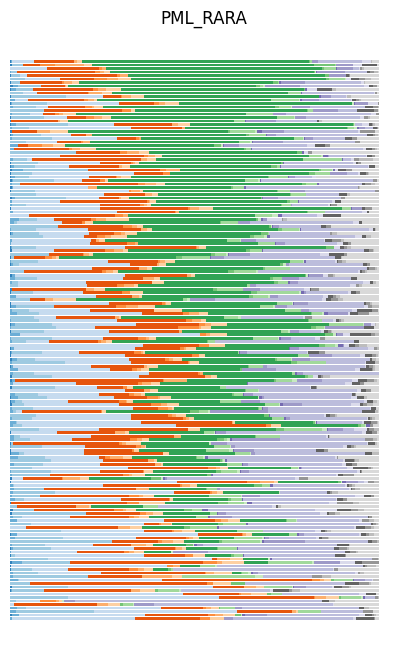

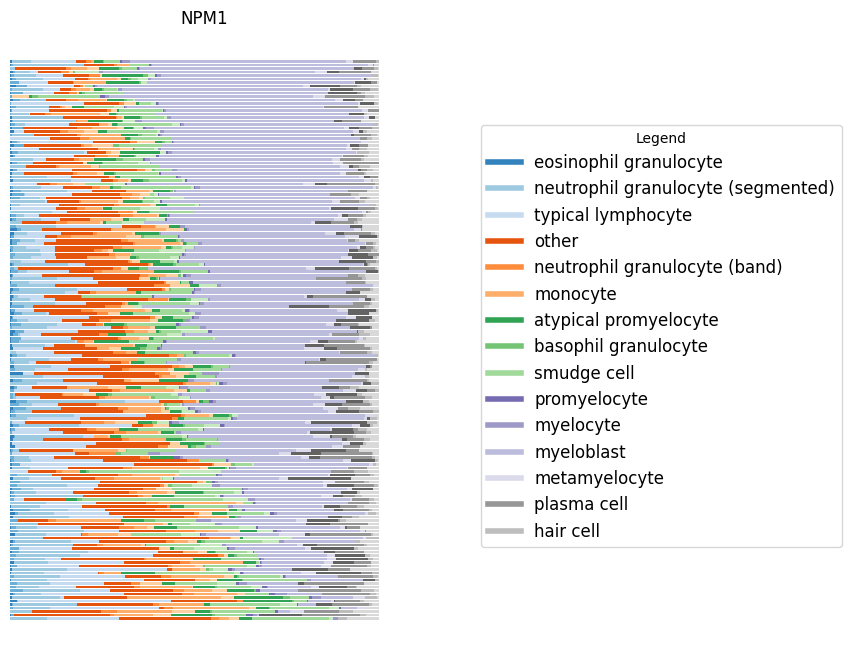

In [111]:
# Iterate over all subfolders in the data folder
for class_folder in os.listdir(data_path):
    class_path = os.path.join(data_path, class_folder)
    
    if os.path.isdir(class_path):
        #Store data for each patient in order to store it
        patient_data = get_sorted_patient_data(class_path)
        plot_sc_percentages_per_patient(patient_data,class_folder,image_path+f"plot_experiment{experiment_nr}_{class_folder}",disable_yticks=True)